<a href="https://colab.research.google.com/github/rajanm/END2_0_Session_5/blob/main/Stanford_Sentiment_Analysis_using_LSTM_RNN_Synonym_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Preview

Your first step to deep learning in NLP. We will be mostly using PyTorch. Just like torchvision, PyTorch provides an official library, torchtext, for handling text-processing pipelines. 

We will be using previous session tweet dataset. Let's just preview the dataset.

In [1]:
!nvidia-smi

Tue Jun  8 03:51:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd

In [3]:
#!pip install pytreebank

In [4]:
# Load data
#import pytreebank
#import sys
#import os

#out_path = os.path.join(sys.path[0], 'sst_{}.txt')
#dataset = pytreebank.load_sst('./raw_data')

# Store train, dev and test in separate files
#for category in ['train', 'test', 'dev']:
#    with open(out_path.format(category), 'w') as outfile:
#        for item in dataset[category]:
#            outfile.write("__label__{}\t{}\n".format(
#                item.to_labeled_lines()[0][0] + 1,
#                item.to_labeled_lines()[0][1]
#            ))
# Print the length of the training set
#print(len(dataset['train']))


In [5]:
!ls -alh

total 16K
drwxr-xr-x 1 root root 4.0K Jun  1 13:40 .
drwxr-xr-x 1 root root 4.0K Jun  8 03:48 ..
drwxr-xr-x 4 root root 4.0K Jun  1 13:40 .config
drwxr-xr-x 1 root root 4.0K Jun  1 13:40 sample_data


In [6]:
#print(len(dataset['dev']))
#print(len(dataset['test']))

In [7]:
TEXT_COL, LABEL_COL = 'text', 'label'
DATASET_DIR = "/content/"

In [8]:
!pip install nlpaug
!pip install swifter

     |████████████████████████████████| 399kB 9.2MB/s 
     |████████████████████████████████| 634kB 7.3MB/s 
     |████████████████████████████████| 296kB 14.5MB/s 
     |████████████████████████████████| 583kB 22.7MB/s 
     |████████████████████████████████| 122kB 27.9MB/s 
     |████████████████████████████████| 17.2MB 171kB/s 
     |████████████████████████████████| 48.5MB 60kB/s 
     |████████████████████████████████| 204kB 41.4MB/s 
     |████████████████████████████████| 133kB 59.4MB/s 
     |████████████████████████████████| 81kB 13.1MB/s 
     |████████████████████████████████| 71kB 12.0MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 3.1MB 30.3MB/s 
     |████████████████████████████████| 1.3MB 37.9MB/s 
     |████████████████████████████████| 92kB 12.9MB/s 
     |████████████████████████████████| 296kB 58.4MB/s 
     |████████████████████████████████| 143kB 56.3MB/s 
  Created wheel for swifter: filename=swifter-1.0.7-cp37

In [9]:
#download the stanford dataset to local storage for processing
!wget http://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip

--2021-06-08 03:51:29--  http://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip [following]
--2021-06-08 03:51:29--  https://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6372817 (6.1M) [application/zip]
Saving to: ‘stanfordSentimentTreebank.zip’

stanfordSentimentTr 100%[===================>]   6.08M  8.42MB/s    in 0.7s    

2021-06-08 03:51:30 (8.42 MB/s) - ‘stanfordSentimentTreebank.zip’ saved [6372817/6372817]



In [10]:
!unzip -o stanfordSentimentTreebank.zip

Archive:  stanfordSentimentTreebank.zip
   creating: stanfordSentimentTreebank/
  inflating: stanfordSentimentTreebank/datasetSentences.txt  
   creating: __MACOSX/
   creating: __MACOSX/stanfordSentimentTreebank/
  inflating: __MACOSX/stanfordSentimentTreebank/._datasetSentences.txt  
  inflating: stanfordSentimentTreebank/datasetSplit.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._datasetSplit.txt  
  inflating: stanfordSentimentTreebank/dictionary.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._dictionary.txt  
  inflating: stanfordSentimentTreebank/original_rt_snippets.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._original_rt_snippets.txt  
  inflating: stanfordSentimentTreebank/README.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._README.txt  
  inflating: stanfordSentimentTreebank/sentiment_labels.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._sentiment_labels.txt  
  inflating: stanfordSentimentTreebank/SOStr.txt  
  inflating: stanfo

In [11]:
!ls -alh
!ls -alh stanfordSentimentTreebank/

total 6.2M
drwxr-xr-x 1 root root 4.0K Jun  8 03:51 .
drwxr-xr-x 1 root root 4.0K Jun  8 03:48 ..
drwxr-xr-x 4 root root 4.0K Jun  1 13:40 .config
drwxrwxr-x 3 root root 4.0K Oct  9  2013 __MACOSX
drwxr-xr-x 1 root root 4.0K Jun  1 13:40 sample_data
drwxr-xr-x 2 root root 4.0K Oct  9  2013 stanfordSentimentTreebank
-rw-r--r-- 1 root root 6.1M Oct  9  2013 stanfordSentimentTreebank.zip
total 20M
drwxr-xr-x 2 root root 4.0K Oct  9  2013 .
drwxr-xr-x 1 root root 4.0K Jun  8 03:51 ..
-rwxr-xr-x 1 root root 1.3M Oct  9  2013 datasetSentences.txt
-rwxr-xr-x 1 root root  82K Oct  9  2013 datasetSplit.txt
-rwxr-xr-x 1 root root  12M Oct  9  2013 dictionary.txt
-rwxr-xr-x 1 root root 1.2M Feb  2  2013 original_rt_snippets.txt
-rwxr-xr-x 1 root root 2.4K Oct  9  2013 README.txt
-rwxr-xr-x 1 root root 3.2M Oct  9  2013 sentiment_labels.txt
-rwxr-xr-x 1 root root 1.2M Feb  2  2013 SOStr.txt
-rwxr-xr-x 1 root root 1.3M Feb  2  2013 STree.txt


In [12]:
#import all libraries required for the notebook
import os
import pandas as pd

#import nlp augumenter library
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action
import swifter

from tqdm.auto import tqdm
tqdm.pandas()

In [13]:
#set data directory
data_dir = 'stanfordSentimentTreebank'

In [14]:
#load sentiment labels
sentiment_labels = pd.read_csv(os.path.join(data_dir, "sentiment_labels.txt"), names=['phrase_ids', 'sentiment_values'], sep="|", header=0)

In [15]:
#sample the sentiment labels data - 10 rows
sentiment_labels.head(10)

,phrase_ids,sentiment_values
0,0,0.50000
1,1,0.50000
2,2,0.44444
3,3,0.50000
4,4,0.42708
5,5,0.37500
6,6,0.41667
7,7,0.54167
8,8,0.33333
9,9,0.45833


In [16]:
# function to convert label (sentiment value) to 5 classes
# for very negative, negative, neutral, positive, very positive
def discretize_label(label):
    # very negative
    if label <= 0.2: return 0
    # negative
    if label <= 0.4: return 1
    # neutral
    if label <= 0.6: return 2
    # positive
    if label <= 0.8: return 3
    # very positive
    return 4

In [17]:
sentiment_labels['sentiment_values'] = sentiment_labels['sentiment_values'].progress_apply(discretize_label)

In [18]:
#sample the sentiment labels data - 10 rows - after converting labels to classes
sentiment_labels.head(10)

,phrase_ids,sentiment_values
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
5,5,1
6,6,2
7,7,2
8,8,1
9,9,2


In [19]:
#load the sentences
sentence_ids = pd.read_csv(os.path.join(data_dir, "datasetSentences.txt"), sep="\t")
sentence_ids.head(10)

,sentence_index,sentence
0,1,The Rock is destined to be the 21st Century 's...
1,2,The gorgeously elaborate continuation of `` Th...
2,3,Effective but too-tepid biopic
3,4,If you sometimes like to go to the movies to h...
4,5,"Emerges as something rare , an issue movie tha..."
5,6,The film provides some great insight into the ...
6,7,Offers that rare combination of entertainment ...
7,8,Perhaps no picture ever made has more literall...
8,9,Steers turns in a snappy screenplay that curls...
9,10,But he somehow pulls it off .


In [20]:
#load the dictionary and sample 10 rows
dictionary = pd.read_csv(os.path.join(data_dir, "dictionary.txt"), sep="|", names=['phrase', 'phrase_ids'])
dictionary.head(10)

,phrase,phrase_ids
0,!,0
1,! ',22935
2,! '',18235
3,! Alas,179257
4,! Brilliant,22936
5,! Brilliant !,40532
6,! Brilliant ! ',22937
7,! C'mon,60624
8,! Gollum 's ` performance ' is incredible,13402
9,"! Oh , look at that clever angle ! Wow , a jum...",179258


In [21]:
#load the train/test data and sample 10 rows
train_test_split = pd.read_csv(os.path.join(data_dir, "datasetSplit.txt"))
train_test_split.head(10)

,sentence_index,splitset_label
0,1,1
1,2,1
2,3,2
3,4,2
4,5,2
5,6,2
6,7,2
7,8,2
8,9,2
9,10,2


In [22]:
sentence_phrase_merge = pd.merge(sentence_ids, dictionary, left_on='sentence', right_on='phrase')
sentence_phrase_split = pd.merge(sentence_phrase_merge, train_test_split, on='sentence_index')
input_dataset = pd.merge(sentence_phrase_split, sentiment_labels, on='phrase_ids')
input_dataset['phrase_cleaned'] = input_dataset['sentence'].str.replace(r"\s('s|'d|'re|'ll|'m|'ve|n't)\b", lambda m: m.group(1))

In [23]:
input_dataset.describe()

,sentence_index,phrase_ids,splitset_label,sentiment_values
count,11286.000000,11286.000000,11286.000000,11286.000000
mean,5910.961102,132003.589846,1.373294,2.059986
std,3422.455572,68214.626430,0.647295,1.287835
min,1.000000,3467.000000,1.000000,0.000000
25%,2951.250000,67402.000000,1.000000,1.000000
50%,5904.500000,144063.500000,1.000000,2.000000
75%,8865.750000,188139.750000,2.000000,3.000000
max,11855.000000,238977.000000,3.000000,4.000000


In [24]:
input_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11286 entries, 0 to 11285
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sentence_index    11286 non-null  int64 
 1   sentence          11286 non-null  object
 2   phrase            11286 non-null  object
 3   phrase_ids        11286 non-null  int64 
 4   splitset_label    11286 non-null  int64 
 5   sentiment_values  11286 non-null  int64 
 6   phrase_cleaned    11286 non-null  object
dtypes: int64(4), object(3)
memory usage: 705.4+ KB


In [25]:
input_dataset.head(10)

,sentence_index,sentence,phrase,phrase_ids,splitset_label,sentiment_values,phrase_cleaned
0,1,The Rock is destined to be the 21st Century 's...,The Rock is destined to be the 21st Century 's...,226166,1,3,The Rock is destined to be the 21st Century's ...
1,2,The gorgeously elaborate continuation of `` Th...,The gorgeously elaborate continuation of `` Th...,226300,1,4,The gorgeously elaborate continuation of `` Th...
2,3,Effective but too-tepid biopic,Effective but too-tepid biopic,13995,2,2,Effective but too-tepid biopic
3,4,If you sometimes like to go to the movies to h...,If you sometimes like to go to the movies to h...,14123,2,3,If you sometimes like to go to the movies to h...
4,5,"Emerges as something rare , an issue movie tha...","Emerges as something rare , an issue movie tha...",13999,2,4,"Emerges as something rare , an issue movie tha..."
5,6,The film provides some great insight into the ...,The film provides some great insight into the ...,14498,2,2,The film provides some great insight into the ...
6,7,Offers that rare combination of entertainment ...,Offers that rare combination of entertainment ...,14351,2,4,Offers that rare combination of entertainment ...
7,8,Perhaps no picture ever made has more literall...,Perhaps no picture ever made has more literall...,14371,2,3,Perhaps no picture ever made has more literall...
8,9,Steers turns in a snappy screenplay that curls...,Steers turns in a snappy screenplay that curls...,225968,2,3,Steers turns in a snappy screenplay that curls...
9,10,But he somehow pulls it off .,But he somehow pulls it off .,222746,2,3,But he somehow pulls it off .


In [26]:
output_dataset = input_dataset.copy()
input_dataset_aug_synonym = input_dataset.copy()
aug_synonym = naw.SynonymAug(aug_src='wordnet')
synonym_sentences = input_dataset_aug_synonym['sentence'].progress_apply(aug_synonym.augment)
#synonym_sentences = input_dataset_aug_synonym['sentence'].swifter.set_npartitions(6).progress_bar(True).apply(aug_synonym.augment)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [27]:
output_dataset.describe()

,sentence_index,phrase_ids,splitset_label,sentiment_values
count,11286.000000,11286.000000,11286.000000,11286.000000
mean,5910.961102,132003.589846,1.373294,2.059986
std,3422.455572,68214.626430,0.647295,1.287835
min,1.000000,3467.000000,1.000000,0.000000
25%,2951.250000,67402.000000,1.000000,1.000000
50%,5904.500000,144063.500000,1.000000,2.000000
75%,8865.750000,188139.750000,2.000000,3.000000
max,11855.000000,238977.000000,3.000000,4.000000


In [28]:
synonym_sentences.head(10)

0    The Rock embody destined to cost the twenty fi...
1    The resplendently elaborate continuation of ` ...
2                     In effect but too - tepid biopic
3    If you sometimes corresponding to live on to t...
4    Emerges as something rare, an issue moving pic...
5    The film provides some heavy sixth sense into ...
6    Offers that rare combination of entertainment ...
7    Perhaps no picture ever so made has to a great...
8    Steers turns in a jaunty screenplay that curls...
9     But he someway pulls information technology off.
Name: sentence, dtype: object

In [29]:
input_dataset_aug_synonym['sentence'] = synonym_sentences
input_dataset_aug_synonym.head(10)
#input_dataset_aug_synonym.to_csv('sst_input_dataset_aug_synonym.csv')

,sentence_index,sentence,phrase,phrase_ids,splitset_label,sentiment_values,phrase_cleaned
0,1,The Rock embody destined to cost the twenty fi...,The Rock is destined to be the 21st Century 's...,226166,1,3,The Rock is destined to be the 21st Century's ...
1,2,The resplendently elaborate continuation of ` ...,The gorgeously elaborate continuation of `` Th...,226300,1,4,The gorgeously elaborate continuation of `` Th...
2,3,In effect but too - tepid biopic,Effective but too-tepid biopic,13995,2,2,Effective but too-tepid biopic
3,4,If you sometimes corresponding to live on to t...,If you sometimes like to go to the movies to h...,14123,2,3,If you sometimes like to go to the movies to h...
4,5,"Emerges as something rare, an issue moving pic...","Emerges as something rare , an issue movie tha...",13999,2,4,"Emerges as something rare , an issue movie tha..."
5,6,The film provides some heavy sixth sense into ...,The film provides some great insight into the ...,14498,2,2,The film provides some great insight into the ...
6,7,Offers that rare combination of entertainment ...,Offers that rare combination of entertainment ...,14351,2,4,Offers that rare combination of entertainment ...
7,8,Perhaps no picture ever so made has to a great...,Perhaps no picture ever made has more literall...,14371,2,3,Perhaps no picture ever made has more literall...
8,9,Steers turns in a jaunty screenplay that curls...,Steers turns in a snappy screenplay that curls...,225968,2,3,Steers turns in a snappy screenplay that curls...
9,10,But he someway pulls information technology off.,But he somehow pulls it off .,222746,2,3,But he somehow pulls it off .


In [30]:
output_dataset = output_dataset.append(input_dataset_aug_synonym)
output_dataset.describe()

,sentence_index,phrase_ids,splitset_label,sentiment_values
count,22572.000000,22572.000000,22572.000000,22572.000000
mean,5910.961102,132003.589846,1.373294,2.059986
std,3422.379755,68213.115301,0.647281,1.287807
min,1.000000,3467.000000,1.000000,0.000000
25%,2951.000000,67392.000000,1.000000,1.000000
50%,5904.500000,144063.500000,1.000000,2.000000
75%,8866.000000,188141.000000,2.000000,3.000000
max,11855.000000,238977.000000,3.000000,4.000000


In [31]:
output_dataset['label'] = '__label__' + output_dataset['sentiment_values'].map(str) 
#output_dataset.to_csv('sst_output_dataset1.csv')
header = ['label', 'sentence']
#output_dataset.to_csv('sst_output_dataset1.txt', sep ='\t', 
#                      columns=header, index=False, header=False)

In [32]:
# create the train, dev and test datasets in a 60%, 40%, 40% split randomly
import numpy as np

train_output_dataset, dev_output_dataset, test_output_dataset = \
              np.split(output_dataset.sample(frac=1, random_state=42), 
                       [int(.6*len(output_dataset)), int(.8*len(output_dataset))])

In [33]:
train_output_dataset.to_csv('sst_train.txt', sep ='\t', 
                      columns=header, index=False, header=False)

In [34]:
dev_output_dataset.to_csv('sst_dev.txt', sep ='\t', 
                      columns=header, index=False, header=False)

In [35]:
test_output_dataset.to_csv('sst_test.txt', sep ='\t', 
                      columns=header, index=False, header=False)

In [36]:
!ls -alh *.txt

-rw-r--r-- 1 root root 516K Jun  8 04:11 sst_dev.txt
-rw-r--r-- 1 root root 517K Jun  8 04:11 sst_test.txt
-rw-r--r-- 1 root root 1.6M Jun  8 04:11 sst_train.txt


In [37]:
def read_sst5(data_dir, colnames=[LABEL_COL, TEXT_COL]):
    datasets = {}
    for t in ["train", "dev", "test"]:
        df = pd.read_csv(os.path.join(data_dir, f"sst_{t}.txt"), sep='\t', header=None, names=colnames)
        df[LABEL_COL] = df[LABEL_COL].str.replace('__label__', '')
        df[LABEL_COL] = df[LABEL_COL].astype(int)   # Categorical data type for truth labels
        df[LABEL_COL] = df[LABEL_COL] - 1  # Zero-index labels for PyTorch
        datasets[t] = df
    return datasets

In [38]:
data_dict=read_sst5(DATASET_DIR , colnames=[LABEL_COL,TEXT_COL])
data_dict

{'dev':       label                                               text
 0        -1  You calcium n ' t believe anyone would very bu...
 1         2  I wish that Smith, he ' s not making fun of th...
 2         2  So, too, be this comedy astir balmy culture cl...
 3         3  It 's a head-turner -- thoughtfully written , ...
 4         0  can personify every bit tiresome as 9 seconds ...
 ...     ...                                                ...
 4509      2  The best revenge may just be living well becau...
 4510      2   The bottom line is the piece works brilliantly .
 4511      2  Unfolds in a series of achronological vignette...
 4512      2  Intriguing and beautiful film , but those of y...
 4513      1  Information technology was a iniquity and stor...
 
 [4514 rows x 2 columns],
 'test':       label                                               text
 0         0  For a shoot - ' pica em - upward, Ballistic is...
 1         2  Information technology seem like Iodine have c.

In [39]:
data_dict['train'].head(10)

,label,text
0,-1,"... a complete shambles of a movie so sloppy ,..."
1,0,Solondz may be win over that he has something ...
2,0,The Good Girl is a film in which the talent is...
3,0,You could hate it for the same reason .
4,3,"Arliss Howard 's ambitious , moving , and adve..."
5,-1,This is the sort of low-grade dreck that usual...
6,1,`` its successes are also tempered with elemen...
7,3,"A beautiful , entertaining two hours ."
8,2,The cast delivers without sham the raw-nerved ...
9,0,"Cherry red Orchard be naughtily edited, often ..."


In [40]:
data_dict['train'].shape

(13543, 2)

In [41]:
data_dict['dev'].head(10)

,label,text
0,-1,You calcium n ' t believe anyone would very bu...
1,2,"I wish that Smith, he ' s not making fun of th..."
2,2,"So, too, be this comedy astir balmy culture cl..."
3,3,"It 's a head-turner -- thoughtfully written , ..."
4,0,can personify every bit tiresome as 9 seconds ...
5,2,- I as well wanted a little unknown as a suppo...
6,0,But he loses his focus when he concentrates on...
7,1,Ca n't get enough of libidinous young city dwe...
8,3,My Big Fat Greek Wedding is not only the best ...
9,0,"Formulaic to the 51st power , more like ."


In [42]:
data_dict['dev'].shape

(4514, 2)

In [43]:
data_dict['test'].shape

(4515, 2)

In [44]:
data_dict['train'].label.value_counts()

 0    3516
 2    3515
 1    2648
 3    2130
-1    1734
Name: label, dtype: int64

## Defining Fields

Now we shall be defining LABEL as a LabelField, which is a subclass of Field that sets sequential to False (as it’s our numerical category class). Text is a standard Field object, where we have decided to use the spaCy tokenizer and convert all the text to lower‐ case.

In [45]:
# Import Library
import random
import torch, torchtext
from torchtext import legacy
from torchtext.legacy import data

# Manual Seed
SEED = 43
torch.manual_seed(SEED)

In [46]:
Text = data.Field(sequential = True, tokenize = 'spacy', batch_first =True, include_lengths=True)#Defines a datatype together with instructions for converting to Tensor.
Label = data.LabelField(tokenize ='spacy', is_target=True, batch_first =True, sequential =False)

Having defined those fields, we now need to produce a list that maps them onto the list of rows that are in the CSV:

In [47]:
fields=[('text',Text),('label',Label)]

Armed with our declared fields, lets convert from pandas to list to torchtext. We could also use TabularDataset to apply that definition to the CSV directly but showing an alternative approach too.

In [48]:
example_train=[data.Example.fromlist([data_dict['train'].text[i],data_dict['train'].label[i]],fields) for i in range (data_dict['train'].shape[0])]

In [49]:
# Creating training dataset
train = data.Dataset(example_train, fields)

Similarly, perform the above step for validation (dev) dataset.

In [50]:
example_dev=[data.Example.fromlist([data_dict['dev'].text[i],data_dict['dev'].label[i]],fields) for i in range (data_dict['dev'].shape[0])]

In [51]:
# Creating dev/validation dataset
dev = data.Dataset(example_dev, fields)

In [52]:
train, dev

(<torchtext.legacy.data.dataset.Dataset at 0x7f71e04b2f90>,
 <torchtext.legacy.data.dataset.Dataset at 0x7f71dfd5fb10>)

In [53]:
(len(train),len(dev))

(13543, 4514)

An example from the dataset:

In [54]:
vars(train.examples[10])

{'label': 0,
 'text': ['The',
  'pretensions',
  '--',
  'and',
  'disposable',
  'story',
  '--',
  'sink',
  'the',
  'movie',
  '.']}

In [55]:
vars(dev.examples[10])

{'label': 3,
 'text': ['Nolan',
  'bear',
  'witness',
  'that',
  'he',
  'toilet',
  'cross',
  'sword',
  'with',
  'the',
  'good',
  'of',
  'them',
  'and',
  'helm',
  'a',
  'more',
  'traditionally',
  'plotted',
  'popcorn',
  'thriller',
  'while',
  'surrendering',
  'little',
  'of',
  'his',
  'intellectual',
  'rigor',
  'operating',
  'theatre',
  'creative',
  'composure',
  '.']}

## Building Vocabulary

At this point we would have built a one-hot encoding of each word that is present in the dataset—a rather tedious process. Thankfully, torchtext will do this for us, and will also allow a max_size parameter to be passed in to limit the vocabulary to the most common words. This is normally done to prevent the construction of a huge, memory-hungry model. We don’t want our GPUs too overwhelmed, after all. 


In [56]:
Text.build_vocab(train, vectors = "glove.6B.300d", 
                 unk_init = torch.Tensor.normal_)
Label.build_vocab(train)

.vector_cache/glove.6B.zip: 862MB [02:39, 5.39MB/s]                           
100%|█████████▉| 399270/400000 [00:34<00:00, 11551.27it/s]

By default, torchtext will add two more special tokens, <unk> for unknown words and <pad>, a padding token that will be used to pad all our text to roughly the same size to help with efficient batching on the GPU.

In [57]:
print('Size of input vocab : ', len(Text.vocab))
print('Size of label vocab : ', len(Label.vocab))
print('Top 10 words appreared repeatedly :', list(Text.vocab.freqs.most_common(10)))
print('Labels : ', Label.vocab.stoi)

Size of input vocab :  22130
Size of label vocab :  5
Top 10 words appreared repeatedly : [('.', 13325), (',', 11377), ('the', 9794), ('a', 7146), ('of', 7129), ('and', 7015), ('-', 5275), ('to', 5038), ("'", 3926), ('is', 3445)]
Labels :  defaultdict(None, {0: 0, 2: 1, 1: 2, 3: 3, -1: 4})


**Lots of stopwords!!**

Now we need to create a data loader to feed into our training loop. Torchtext provides the BucketIterator method that will produce what it calls a Batch, which is almost, but not quite, like the data loader we used on images.

But at first declare the device we are using.

In [58]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [59]:
train_iterator, valid_iterator = data.BucketIterator.splits((train, dev), batch_size = 32, 
                                                            sort_key = lambda x: len(x.text),
                                                            sort_within_batch=True, device = device)

Save the vocabulary for later use

In [60]:
import os, pickle
tokenizer_path = './tokenizer.pkl'
with open(tokenizer_path, 'wb') as tokens: 
    pickle.dump(Text.vocab.stoi, tokens)

## Defining Our Model

We use the Embedding and LSTM modules in PyTorch to build a simple model for classifying tweets.

In this model we create three layers. 
1. First, the words in our tweets are pushed into an Embedding layer, which we have established as a 300-dimensional vector embedding. 
2. That’s then fed into a 2 stacked-LSTMs with 100 hidden features (again, we’re compressing down from the 300-dimensional input like we did with images). We are using 2 LSTMs for using the dropout.
3. Finally, the output of the LSTM (the final hidden state after processing the incoming tweet) is pushed through a standard fully connected layer with three outputs to correspond to our five possible classes (very negative, negative, very positive, positive, or neutral).

In [61]:
import torch.nn as nn
import torch.nn.functional as F

class classifier(nn.Module):
    
    # Define all the layers used in model
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout,pad_idx):
        
        super().__init__()          
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim,padding_idx = pad_idx)
        
        # LSTM layer
        self.encoder = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           dropout=dropout,
                           batch_first=True)
        # try using nn.GRU or nn.RNN here and compare their performances
        # try bidirectional and compare their performances
        
        # Dense layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, text, text_lengths):
        
        # text = [batch size, sent_length]
        embedded = self.embedding(text)
        # embedded = [batch size, sent_len, emb dim]
      
        # packed sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True)
        
        packed_output, (hidden, cell) = self.encoder(packed_embedded)
        #hidden = [batch size, num layers * num directions,hid dim]
        #cell = [batch size, num layers * num directions,hid dim]
    
        # Hidden = [batch size, hid dim * num directions]
        dense_outputs = self.fc(hidden)   
        
        # Final activation function softmax
        output = F.softmax(dense_outputs[0], dim=1)
            
        return output

In [62]:
# Define hyperparameters
size_of_vocab = len(Text.vocab)
embedding_dim = 300
num_hidden_nodes = 256
num_output_nodes = 5
num_layers = 2
dropout = 0.5
PAD_IDX = Text.vocab.stoi[Text.pad_token]
# Instantiate the model
model = classifier(size_of_vocab, embedding_dim, num_hidden_nodes, num_output_nodes, num_layers, dropout, PAD_IDX)

In [63]:
print(model)

#No. of trianable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    
print(f'The model has {count_parameters(model):,} trainable parameters')

classifier(
  (embedding): Embedding(22130, 300, padding_idx=1)
  (encoder): LSTM(300, 256, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=256, out_features=5, bias=True)
)
The model has 7,738,013 trainable parameters


In [64]:
pretrained_embeddings = Text.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([22130, 300])


In [65]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.0166, -0.4668,  2.0909,  ...,  0.3555, -1.2744,  0.5221],
        [-1.6279,  1.1723,  0.0272,  ..., -0.5068,  0.5402, -0.6818],
        [-0.1256,  0.0136,  0.1031,  ..., -0.3422, -0.0224,  0.1368],
        ...,
        [ 0.4261, -0.1805,  0.1000,  ...,  0.1763, -0.3132, -0.0590],
        [ 0.0206, -0.2081,  0.4568,  ...,  0.4254,  0.2714, -0.1388],
        [-0.0244, -1.1009, -0.4874,  ..., -0.2397,  0.8099,  0.6723]])

In [66]:
UNK_IDX = Text.vocab.stoi[Text.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(embedding_dim)
model.embedding.weight.data[PAD_IDX] = torch.zeros(embedding_dim)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1256,  0.0136,  0.1031,  ..., -0.3422, -0.0224,  0.1368],
        ...,
        [ 0.4261, -0.1805,  0.1000,  ...,  0.1763, -0.3132, -0.0590],
        [ 0.0206, -0.2081,  0.4568,  ...,  0.4254,  0.2714, -0.1388],
        [-0.0244, -1.1009, -0.4874,  ..., -0.2397,  0.8099,  0.6723]])


## Model Training and Evaluation

First define the optimizer and loss functions

In [67]:
import torch.optim as optim

# define optimizer and loss
optimizer = optim.Adam(model.parameters(), lr=2e-4)
criterion = nn.CrossEntropyLoss()

# define metric
def binary_accuracy(preds, y):
    #round predictions to the closest integer
    _, predictions = torch.max(preds, 1)
    
    correct = (predictions == y).float() 
    acc = correct.sum() / len(correct)
    return acc
    
# push to cuda if available
model = model.to(device)
criterion = criterion.to(device)

The main thing to be aware of in this new training loop is that we have to reference `batch.tweets` and `batch.labels` to get the particular fields we’re interested in; they don’t fall out quite as nicely from the enumerator as they do in torchvision.

**Training Loop**

In [68]:
def train(model, iterator, optimizer, criterion):
    
    # initialize every epoch 
    epoch_loss = 0
    epoch_acc = 0
    
    # set the model in training phase
    model.train()  
    
    for batch in iterator:
        
        # resets the gradients after every batch
        optimizer.zero_grad()   
        
        # retrieve text and no. of words
        text, text_lengths = batch.text
        
        # convert to 1D tensor
        predictions = model(text, text_lengths).squeeze()  
        
        # compute the loss
        loss = criterion(predictions, batch.label)        
        
        # compute the binary accuracy
        acc = binary_accuracy(predictions, batch.label)   
        
        # backpropage the loss and compute the gradients
        loss.backward()       
        
        # update the weights
        optimizer.step()      
        
        # loss and accuracy
        epoch_loss += loss.item()  
        epoch_acc += acc.item()    
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

**Evaluation Loop**

In [69]:
def evaluate(model, iterator, criterion):
    
    # initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    # deactivating dropout layers
    model.eval()
    
    # deactivates autograd
    with torch.no_grad():
    
        for batch in iterator:
        
            # retrieve text and no. of words
            text, text_lengths = batch.text
            
            # convert to 1d tensor
            predictions = model(text, text_lengths).squeeze()
            
            # compute loss and accuracy
            loss = criterion(predictions, batch.label)
            acc = binary_accuracy(predictions, batch.label)
            
            # keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

**Let's Train and Evaluate the Model**

In [70]:
N_EPOCHS = 20
best_valid_loss = float('inf')
train_loss_trend=[]
valid_loss_trend=[]
train_acc_trend=[]
valid_acc_trend=[]
model_path='./saved_weights.pt'

for epoch in range(N_EPOCHS):
     
    # train the model
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    train_loss_trend.append(train_loss)
    train_acc_trend.append(train_acc)
    
    # evaluate the model
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    valid_loss_trend.append(valid_loss)
    valid_acc_trend.append(valid_acc)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), model_path)
    
    print('\tEpoch No: ', epoch)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% \n')

100%|█████████▉| 399270/400000 [00:50<00:00, 11551.27it/s]

	Epoch No:  0
	Train Loss: 1.563 | Train Acc: 31.18%
	 Val. Loss: 1.533 |  Val. Acc: 35.39% 

	Epoch No:  1
	Train Loss: 1.502 | Train Acc: 38.31%
	 Val. Loss: 1.489 |  Val. Acc: 40.07% 

	Epoch No:  2
	Train Loss: 1.463 | Train Acc: 43.07%
	 Val. Loss: 1.476 |  Val. Acc: 41.42% 

	Epoch No:  3
	Train Loss: 1.413 | Train Acc: 48.70%
	 Val. Loss: 1.455 |  Val. Acc: 43.79% 

	Epoch No:  4
	Train Loss: 1.366 | Train Acc: 53.94%
	 Val. Loss: 1.478 |  Val. Acc: 40.80% 

	Epoch No:  5
	Train Loss: 1.317 | Train Acc: 59.10%
	 Val. Loss: 1.429 |  Val. Acc: 46.54% 

	Epoch No:  6
	Train Loss: 1.267 | Train Acc: 64.45%
	 Val. Loss: 1.418 |  Val. Acc: 47.69% 

	Epoch No:  7
	Train Loss: 1.223 | Train Acc: 68.64%
	 Val. Loss: 1.412 |  Val. Acc: 47.80% 

	Epoch No:  8
	Train Loss: 1.192 | Train Acc: 71.84%
	 Val. Loss: 1.412 |  Val. Acc: 48.35% 

	Epoch No:  9
	Train Loss: 1.159 | Train Acc: 75.20%
	 Val. Loss: 1.414 |  Val. Acc: 48.02% 

	Epoch No:  10
	Train Loss: 1.134 | Train Acc: 77.66%
	 Val.

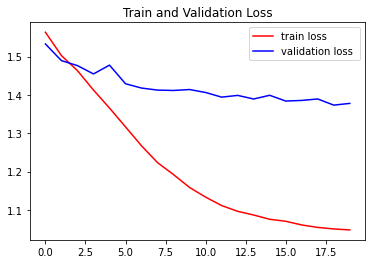

In [71]:
import matplotlib.pyplot as plt
plt.plot(train_loss_trend,label='train loss',color="red")
plt.plot(valid_loss_trend,label='validation loss ',color="blue")
plt.title("Train and Validation Loss")
plt.legend()
plt.show()


**Let's Test the Model**

The model will be evaluated with the model test data that was not used for training.


In [72]:
example_test=[data.Example.fromlist([data_dict['test'].text[i],data_dict['test'].label[i]],fields) for i in range (data_dict['test'].shape[0])]
test = data.Dataset(example_test, fields)
test_iterator=data.BucketIterator(test,batch_size=32,
                                  sort_key = lambda x: len(x.text),
                                  sort_within_batch=True,device=device)

In [73]:
model.load_state_dict(torch.load(model_path))
test_loss, test_acc = evaluate(model, test_iterator, criterion)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 1.368 | Test Acc: 52.85%


**Let's predict!**

In [74]:
!pip install spacy
!python -m spacy download en_core_web_trf


✘ No compatible model found for 'en_core_web_trf' (spaCy v2.2.4).



In [75]:
model.load_state_dict(torch.load(model_path));
model.eval();
tokenizer_file = open(tokenizer_path, 'rb')
tokenizer = pickle.load(tokenizer_file)

#inference 

import spacy
# load trf instead of base 'en' for greater accuracy
nlp = spacy.load('en') 


def predict_sentiment(text):
    #very negative to very positive (- -, -, 0, +, ++)
    #Labels :  defaultdict(None, {3: 0, 1: 1, 2: 2, 4: 3, 0: 4})
    
    categories = {3: "very negative", 1:"negative", 2:"Neutral",4:"positive",0:"very positive"}
    
    # tokenize the text 
    tokenized = [tok.text for tok in nlp.tokenizer(text)] 
    # convert to integer sequence using predefined tokenizer dictionary
    indexed = [tokenizer[t] for t in tokenized]        
    # compute no. of words        
    length = [len(indexed)]
    # convert to tensor                                    
    tensor = torch.LongTensor(indexed).to(device)   
    # reshape in form of batch, no. of words           
    tensor = tensor.unsqueeze(1).T  
    # convert to tensor                          
    length_tensor = torch.LongTensor(length)
    # Get the model prediction                  
    prediction = model(tensor, length_tensor)

    _, pred = torch.max(prediction, 1) 
    
    return categories[pred.item()]

###Predict Sentiment###
The sentiment is predicted on unseen data, which was never part of the dev, train, test sets.

In [76]:
# review of mission impossible 5
predict_sentiment("Make no mistake, this predictable movie is clearly part of the Mission: Impossible franchise -- by which we mean it checks off all the usual boxes.")

'very positive'

In [77]:
# review of minari
predict_sentiment("Minari is deeply rooted in the earth, a wellspring of both hope and pain, of boundless promise and terrifying disaster.")

'negative'

In [78]:
# review of godzilla vs kong
predict_sentiment("In a patchwork production full of bad ideas poorly executed, Jia also embodies the story’s only good idea.")

'Neutral'

In [79]:
# review of lunch box
predict_sentiment("Irrfan leads the way, underplayed, yet lasting, like a cardamom between your lips.")

'Neutral'

In [80]:
# review of avengers endgame
predict_sentiment("The Russo brothers' poignant, powerful finale more than lives up to the hype: It's a thrilling conclusion and a deeply emotional exploration of loss and love, duty and honor, friendship and family.")

'negative'

In [81]:
# review of godfather
predict_sentiment("With performances, style and substance to savour, this shows how it is possible to smash box office records without being mindless.")

'negative'

In [82]:
# review of saving private ryan
predict_sentiment("Uncompromising, powerful war movie that does not pull any punches. Pefectly balances the inhumanity of war and the humanity of its protagonists. Devastating and essential viewing.")

'negative'